# Analysis on the learning activities survey

In [2]:
# all libraries we use
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# helper functions
def calculate(series):
    """
    This function aims to calculate six things 
    1. mean of a series
    2. standard deviation of a series
    3. percentage of people voted 4 and 5
    4. percentage of people voted 5
    5. percentage of people voted 1 and 2
    6. percentage of people voted 1

    INPUT
    -------------
    series: a pandas series

    OUTPUT
    -------------
    A numpy array of the following:
    mean: float, mean of the series
    std: float, standard deviation of a series
    p45: float, percentage of people voted 4 and 5
    p5: float, percentage of people voted 5
    p12: float, percentage of people voted 1 and 2
    p1: float, percentage of people voted 1
    """
    #convert the series into integer 
    series = series.astype(int)
    mean = series.mean()
    std = series.std()

    all_count = series.size
    count_1 = (series == 1).sum()
    count_2 = (series == 2).sum()
    count_4 = (series == 4).sum()
    count_5 = (series == 5).sum()

    p45 = ((count_4 + count_5) / all_count)*100
    p5 = ((count_5) / all_count)*100
    p12 = ((count_1 + count_2) / all_count)*100
    p1 = ((count_1) / all_count)*100

    return np.array([mean, std, p45, p5, p12, p1])


In [4]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

In [5]:
dataPath = 'data\LearningActivitiesSurveyNumeric2023.csv'
data_raw = pd.read_csv(dataPath)

In [6]:
data_raw.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q3', 'Q4', 'Q5', 'Q6', 'Q10_1',
       'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q11_1', 'Q11_2', 'Q11_3',
       'Q11_4', 'Q11_5', 'Q11_6', 'Q11', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4',
       'Q2_5', 'Q2_6', 'Q1', 'Q12', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4',
       'Q13_5', 'Q12.1'],
      dtype='object')

In [7]:
#remove all unfinished responses
completion = data_raw['Finished']

In [8]:
# Throwing away unimportant data
useful_data = data_raw.iloc[:, 17:]

In [9]:
# adding completion back to the dataframe
# all 69 responses
# beware only row 2 onwards are data
useful_data_all = useful_data.merge(completion, left_index=True, right_index=True).iloc[2:, :]

# filtering out unfinished response --> dataframe with only 56 complete responses
useful_data_finished = useful_data_all[useful_data_all['Finished'] == "1"]

In [10]:
useful_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 2 to 70
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Q3        69 non-null     object
 1   Q4        69 non-null     object
 2   Q5        67 non-null     object
 3   Q6        67 non-null     object
 4   Q10_1     60 non-null     object
 5   Q10_2     60 non-null     object
 6   Q10_3     60 non-null     object
 7   Q10_4     60 non-null     object
 8   Q10_5     60 non-null     object
 9   Q10_6     60 non-null     object
 10  Q11_1     60 non-null     object
 11  Q11_2     60 non-null     object
 12  Q11_3     60 non-null     object
 13  Q11_4     60 non-null     object
 14  Q11_5     60 non-null     object
 15  Q11_6     60 non-null     object
 16  Q11       12 non-null     object
 17  Q2_1      58 non-null     object
 18  Q2_2      58 non-null     object
 19  Q2_3      58 non-null     object
 20  Q2_4      58 non-null     object
 21  Q2_5      58 non-n

## Analysis by questions

### Background info

Q3 - which year are you in? (4)
Q4 - How much programming experience did you have before university? (4)
Q5 - How confident are you to use Python to complete asignments? (5)
Q6 - What is your level of interest in Python programming? (5)

In [11]:
background_info_df = useful_data_all.iloc[:, :4].dropna()
background_info_df = background_info_df.astype(int)

In [12]:
test = background_info_df[background_info_df['Q3'] == 2]

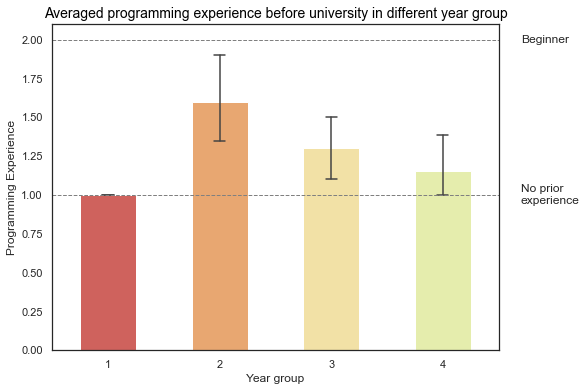

In [131]:
sns.set_theme(style="white", 
              palette="Spectral",
              rc={'figure.figsize':(8,6)})
# experience distribution by Year
g_exp = sns.barplot(x='Q3', y='Q4', 
                    data=background_info_df,
                    width=0.5, 
                    errwidth=1.5,
                    capsize=0.1)
g_exp.set(xlabel="Year group", 
          ylabel="Programming Experience")
plt.axhline(1, linewidth=1, color='grey', ls='--')
plt.text(3.7, 2, 'Beginner', ha='left', va='center')
plt.axhline(2, linewidth=1, color='grey', ls='--')
plt.text(3.7, 1, 'No prior\nexperience', ha='left', va='center')
font_dict_barplot_1 = {'fontsize': 14,
 'fontweight': 10,
 'color': 'black',
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
plt.title("Averaged programming experience before university in different year group", fontdict= font_dict_barplot_1)

plt.show()

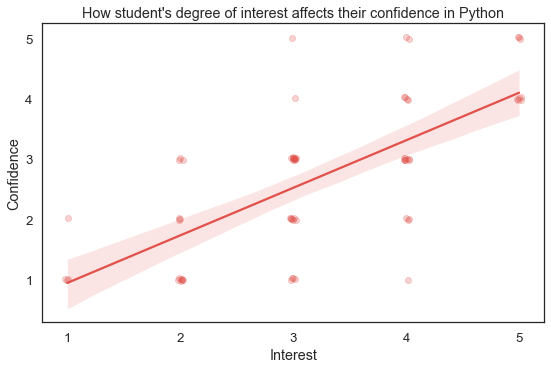

In [115]:
sns.set_theme(font_scale=1.2
              ,style="white"
              ,palette="Spectral"
              ,rc={'figure.figsize':(9,5.5)})
g_interest = sns.regplot(data=background_info_df
                ,x='Q6'
                ,y='Q5'
                ,x_jitter = 0.0255
                , y_jitter = 0.0255
                ,fit_reg = True
                ,scatter_kws = {'alpha' : 1/4}
                )
g_interest.set(xlabel="Interest"
               ,ylabel="Confidence"
               ,yticks=[1,2,3,4,5]
               ,xticks=[1,2,3,4,5]
               ,title="How student's degree of interest affects their confidence in Python")
plt.show()

### Concepts

<ol>
    <li>data type</li>
    <li>flow control</li>
    <li>variable declaration</li>
    <li>basic syntax</li>
    <li>functions</li>
    <li>oop</li>
</ol>

In [241]:
concepts_df = useful_data_all.iloc[:, 4:10].dropna()
concepts_df = concepts_df.astype(int)
concepts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2 to 68
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q10_1   60 non-null     int32
 1   Q10_2   60 non-null     int32
 2   Q10_3   60 non-null     int32
 3   Q10_4   60 non-null     int32
 4   Q10_5   60 non-null     int32
 5   Q10_6   60 non-null     int32
dtypes: int32(6)
memory usage: 1.9 KB


<ul>what do I want to do
    <li>mean and std for each one- average and spread</li>
    <li>percentage of people voted bigger than 4, percentage of people voted 5 - extreme</li>
    <li>percentage of people voted smaller than 2, percentage of people voted 1 - extreme</li>
 </ul>

In [198]:
data_type_n_struc = calculate(concepts_df["Q10_1"])
flow_control = calculate(concepts_df["Q10_2"])
variables = calculate(concepts_df["Q10_3"])
syntax = calculate(concepts_df["Q10_4"])
functions = calculate(concepts_df["Q10_5"])
oop = calculate(concepts_df["Q10_6"])

In [308]:
concepts_dict = {'Data types\nand structures': data_type_n_struc,
                'Flow control\nstructures' : flow_control,
                'Variables\ndeclaration' : variables,
                'Basic\nsyntax' : syntax,
                'Functions' : functions,
                'OOP' : oop
} 

In [309]:
concepts_result_df = pd.DataFrame(concepts_dict, index = ['mean', 'std', 'percent voted 4 or greater', 'percent voted 5', 'percent voted 2 or lower', 'percent voted 1'])

In [310]:
concepts_result_df.transpose().columns

Index(['mean', 'std', 'percent voted 4 or greater', 'percent voted 5',
       'percent voted 2 or lower', 'percent voted 1'],
      dtype='object')

https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd

Text(0.5, 1.0, 'Percentage of students finding the concept sligtly or not at all important')

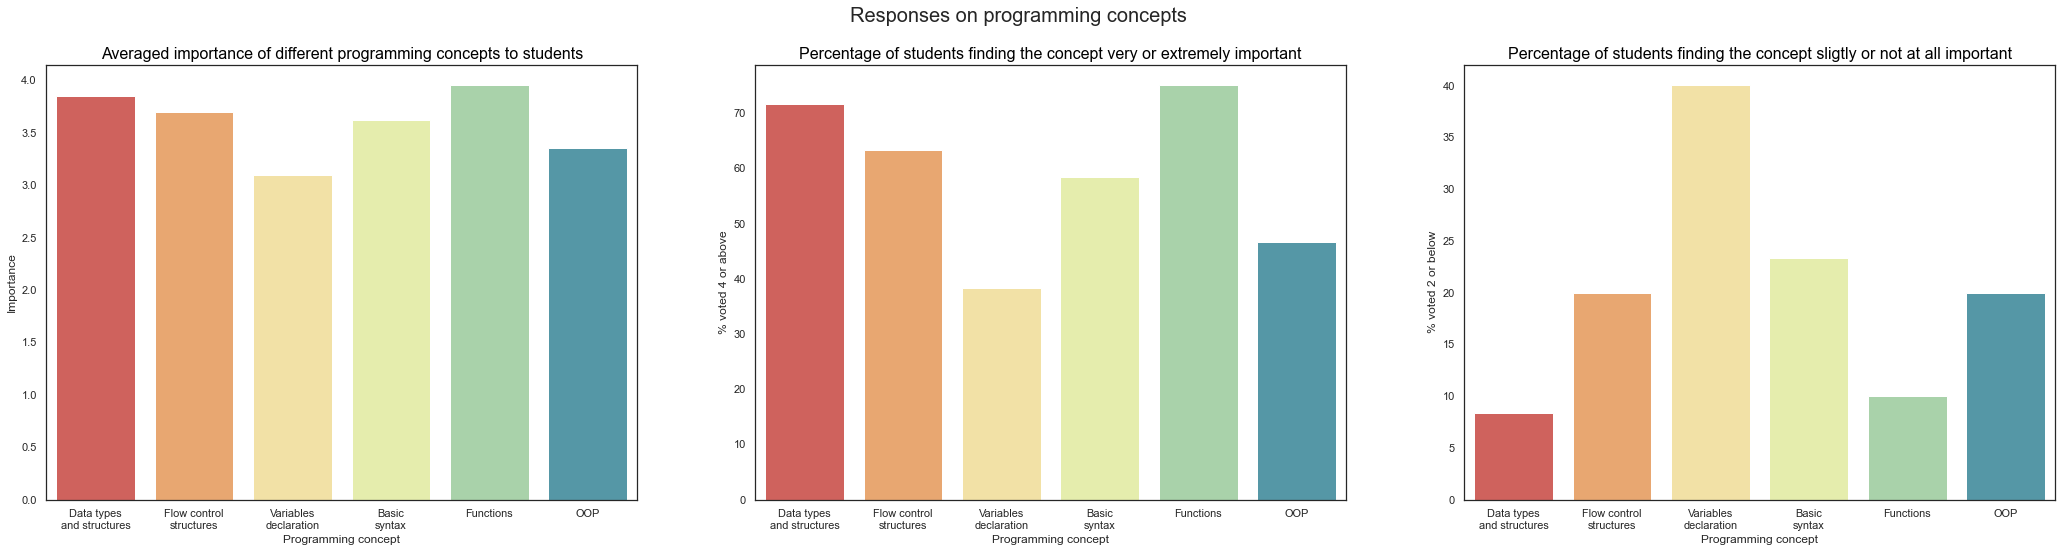

In [338]:
# three plots to show concepts data
sns.set_theme(style="white", 
              palette="Spectral")

font_dict_barplot_1 = {'fontsize': 16,
 'fontweight': 10,
 'color': 'black',
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

fig, axes = plt.subplots(1, 3,
                         figsize=(36,8))

fig.suptitle("Responses on programming concepts", fontsize=20)

############################## barplot to display their relative importance ###########################
g_importance = sns.barplot(x=concepts_result_df.columns, 
                           y=concepts_result_df.transpose()['mean'],
                           ax=axes[0])


g_importance.set(xlabel="Programming concept", 
          ylabel="Importance")
#plt.axhline(4, linewidth=1, color='grey', ls='--')
#plt.axhline(3, linewidth=1, color='grey', ls='--')
#plt.text(5.6, 4, 'Very important', ha='left', va='center')
#plt.text(5.6, 3, 'Moderately important', ha='left', va='center')

axes[0].set_title("Averaged importance of different programming concepts to students", fontdict= font_dict_barplot_1)

############################## important extreme  >4 ##############################
g_importance_max = sns.barplot(x=concepts_result_df.columns, 
                               y=concepts_result_df.transpose()['percent voted 4 or greater'],
                               ax=axes[1])
g_importance_max.set(xlabel="Programming concept", 
          ylabel="% voted 4 or above")
axes[1].set_title("Percentage of students finding the concept very or extremely important", fontdict= font_dict_barplot_1)

############################# not important extreme < 2 ############################
g_importance_min = sns.barplot(x=concepts_result_df.columns, 
                               y=concepts_result_df.transpose()['percent voted 2 or lower'],
                               ax=axes[2])
g_importance_min.set(xlabel="Programming concept", 
          ylabel="% voted 2 or below")
axes[2].set_title("Percentage of students finding the concept sligtly or not at all important", fontdict= font_dict_barplot_1)

### Topics

In [269]:
topics_df = useful_data_all.iloc[:, 10:16].dropna()
topics_df = topics_df.astype(int)
topics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2 to 68
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q11_1   60 non-null     int32
 1   Q11_2   60 non-null     int32
 2   Q11_3   60 non-null     int32
 3   Q11_4   60 non-null     int32
 4   Q11_5   60 non-null     int32
 5   Q11_6   60 non-null     int32
dtypes: int32(6)
memory usage: 1.9 KB


In [271]:
debugging = calculate(topics_df["Q11_1"])
libraries = calculate(topics_df["Q11_2"])
practices = calculate(topics_df["Q11_3"])
understand_code = calculate(topics_df["Q11_4"])
bgm_info = calculate(topics_df["Q11_5"])
appInChem = calculate(topics_df["Q11_6"])

In [283]:
topics_dict = {'Debugging': debugging,
                'Usage of\nlibraries\nand packages' : libraries,
                'Good programming\npractices' : practices,
                "Understand other \npeople's\ncode" : understand_code,
                'Background\nknowledge of\nprogramming' : bgm_info,
                'Applications in\nchemistry' : appInChem
} 

In [284]:
topics_result_df = pd.DataFrame(topics_dict, index = ['mean', 'std', 'percent voted 4 or greater', 'percent voted 5', 'percent voted 2 or lower', 'percent voted 1'])

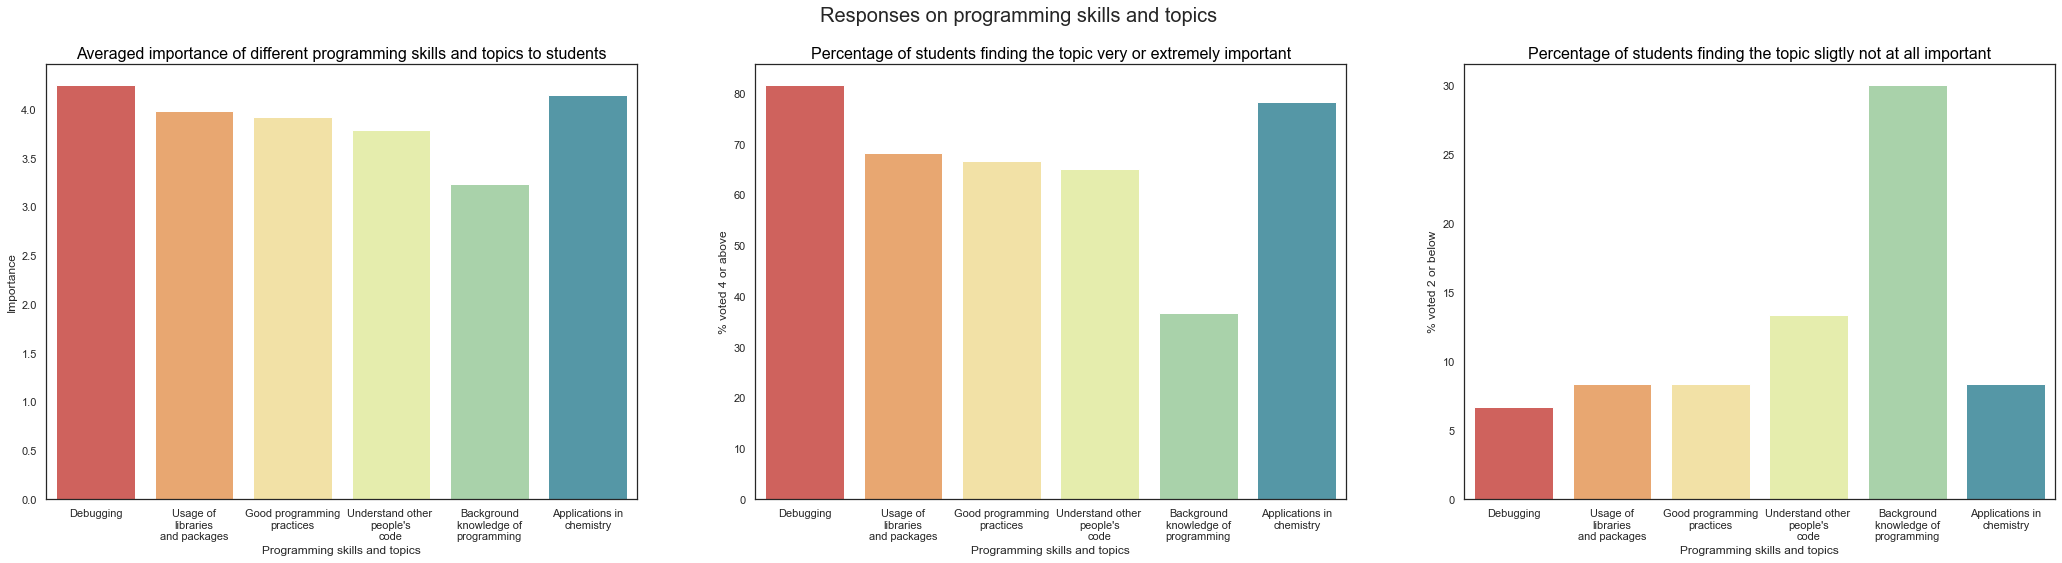

In [343]:
# three plots to show topics data
sns.set_theme(style="white", 
              palette="Spectral")

font_dict_barplot_1 = {'fontsize': 16,
 'fontweight': 10,
 'color': 'black',
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

fig, axes = plt.subplots(1, 3,
                         figsize=(36,8))

fig.suptitle("Responses on programming skills and topics", fontsize=20)

############################## barplot to display their relative importance ###########################
g_topics = sns.barplot(x=topics_result_df.columns, 
                           y=topics_result_df.transpose()['mean'],
                           ax=axes[0])


g_topics.set(xlabel="Programming skills and topics", 
          ylabel="Importance")
#plt.axhline(4, linewidth=1, color='grey', ls='--')
#plt.axhline(3, linewidth=1, color='grey', ls='--')
#plt.text(5.6, 4, 'Very important', ha='left', va='center')
#plt.text(5.6, 3, 'Moderately important', ha='left', va='center')

axes[0].set_title("Averaged importance of different programming skills and topics to students", fontdict= font_dict_barplot_1)

############################## important extreme  >4 ##############################
g_topics_max = sns.barplot(x=topics_result_df.columns, 
                           y=topics_result_df.transpose()['percent voted 4 or greater'],
                           ax=axes[1])
g_topics_max.set(xlabel="Programming skills and topics", 
          ylabel="% voted 4 or above")
axes[1].set_title("Percentage of students finding the topic very or extremely important", fontdict= font_dict_barplot_1)

############################# not important extreme < 2 ############################
g_topics_min = sns.barplot(x=topics_result_df.columns, 
                           y=topics_result_df.transpose()['percent voted 2 or lower'],
                           ax=axes[2])
g_topics_min.set(xlabel="Programming skills and topics", 
          ylabel="% voted 2 or below")
axes[2].set_title("Percentage of students finding the topic sligtly not at all important", fontdict= font_dict_barplot_1)

plt.show()

### Learning activities

In [329]:
activities_df = useful_data_all.iloc[:, 17: 23].dropna()
activities_df = activities_df.astype(int)
activities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 68
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q2_1    58 non-null     int32
 1   Q2_2    58 non-null     int32
 2   Q2_3    58 non-null     int32
 3   Q2_4    58 non-null     int32
 4   Q2_5    58 non-null     int32
 5   Q2_6    58 non-null     int32
dtypes: int32(6)
memory usage: 1.8 KB


In [335]:
fbc = calculate(activities_df["Q2_1"])
fitb = calculate(activities_df["Q2_2"])
pred = calculate(activities_df["Q2_3"])
tweak = calculate(activities_df["Q2_4"])
app_based = calculate(activities_df["Q2_5"])
debug_ex = calculate(activities_df["Q2_6"])

activities_dict = {'Fixing broken\ncode':fbc,
                   'Fill-in-\n-the-blanks':fitb,
                   'Predict the output\nof the code':pred,
                   'Tweaking\nparameters':tweak,
                   'Application-based\nexercises':app_based,
                   'Debugging\nexercises':debug_ex
}
activities_results_df = pd.DataFrame(activities_dict, index = ['mean', 'std', 'percent voted 4 or greater', 'percent voted 5', 'percent voted 2 or lower', 'percent voted 1'])

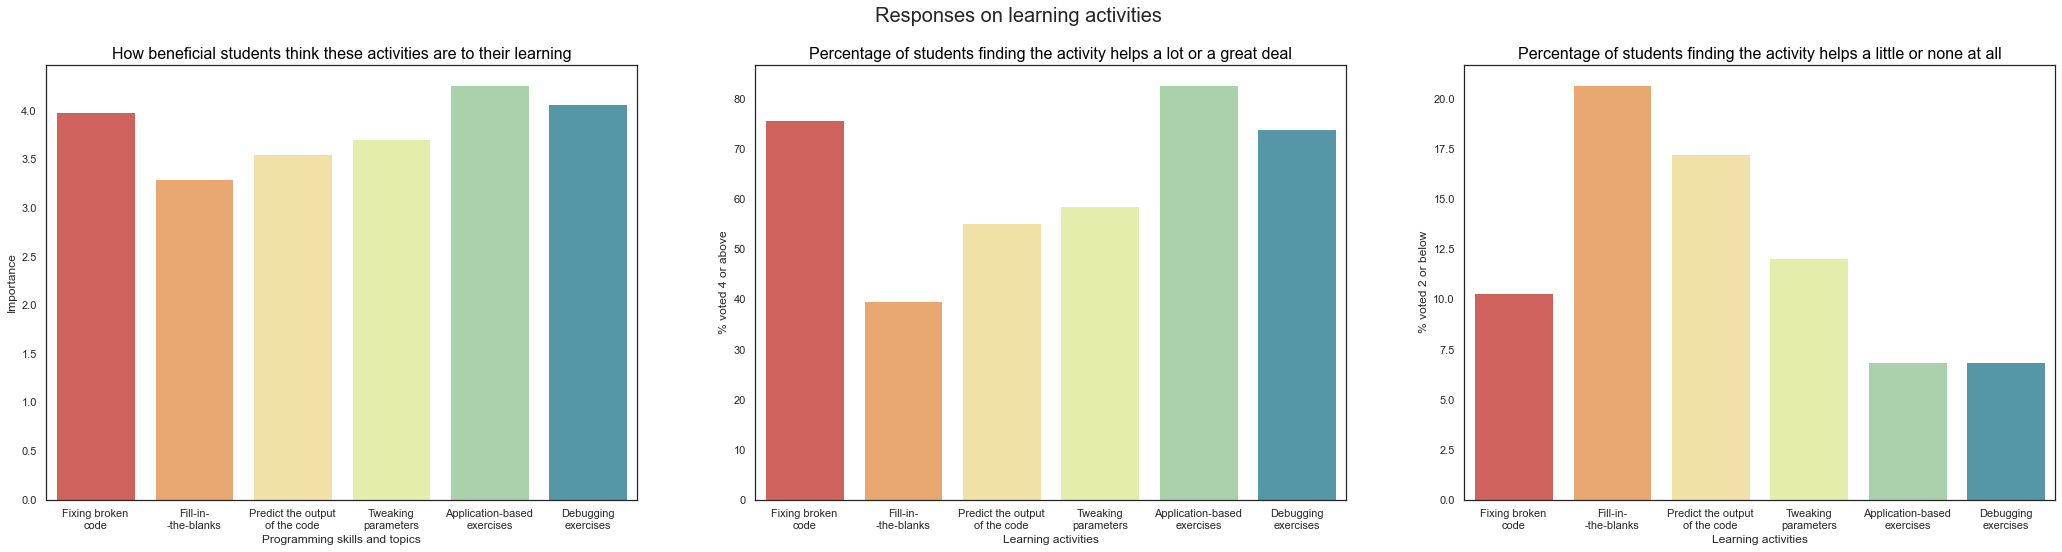

In [337]:
# three plots to show topics data
sns.set_theme(style="white", 
              palette="Spectral")

font_dict_barplot_1 = {'fontsize': 16,
 'fontweight': 10,
 'color': 'black',
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

fig, axes = plt.subplots(1, 3,
                         figsize=(36,8))

fig.suptitle("Responses on learning activities", fontsize=20)

############################## barplot to display their relative importance ###########################
g_LA = sns.barplot(x=activities_results_df.columns, 
                           y=activities_results_df.transpose()['mean'],
                           ax=axes[0])


g_LA.set(xlabel="Programming skills and topics", 
          ylabel="Importance")
#plt.axhline(4, linewidth=1, color='grey', ls='--')
#plt.axhline(3, linewidth=1, color='grey', ls='--')
#plt.text(5.6, 4, 'Very important', ha='left', va='center')
#plt.text(5.6, 3, 'Moderately important', ha='left', va='center')

axes[0].set_title("How beneficial students think these activities are to their learning", fontdict= font_dict_barplot_1)

############################## important extreme  >4 ##############################
g_LA_max = sns.barplot(x=activities_results_df.columns, 
                           y=activities_results_df.transpose()['percent voted 4 or greater'],
                           ax=axes[1])
g_LA_max.set(xlabel="Learning activities", 
          ylabel="% voted 4 or above")
axes[1].set_title("Percentage of students finding the activity helps a lot or a great deal", fontdict= font_dict_barplot_1)

############################# not important extreme < 2 ############################
g_LA_min = sns.barplot(x=activities_results_df.columns, 
                           y=activities_results_df.transpose()['percent voted 2 or lower'],
                           ax=axes[2])
g_LA_min.set(xlabel="Learning activities", 
          ylabel="% voted 2 or below")
axes[2].set_title("Percentage of students finding the activity helps a little or none at all", fontdict= font_dict_barplot_1)

plt.show()

### Feedback

In [15]:
feedback_df = useful_data_all.iloc[:, 25:30].dropna()
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 62
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q13_1   58 non-null     object
 1   Q13_2   58 non-null     object
 2   Q13_3   58 non-null     object
 3   Q13_4   58 non-null     object
 4   Q13_5   58 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


## Analysis by year groups